This notebook finds the skin tones in an image

In [13]:
# Requirements
#! pip install opencv-python

In [14]:
# Libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [15]:
# Input image path
image_path = "images/test_white.jpg"

(1129, 1640, 3)


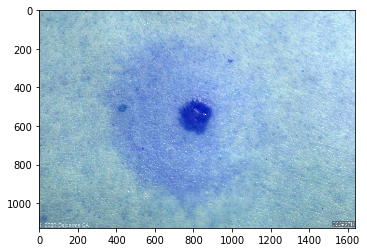

In [16]:
# Read image
img_BGR = cv2.imread(image_path, 3)
print(img_BGR.shape)
plt.imshow(img_BGR);

(113, 164, 3)


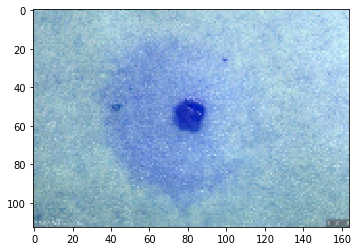

In [17]:
# Resize image
img_BGR_small = cv2.resize(img_BGR, (0, 0), fx = 0.1, fy = 0.1)
print(img_BGR_small.shape)
plt.imshow(img_BGR_small);

(113, 164)


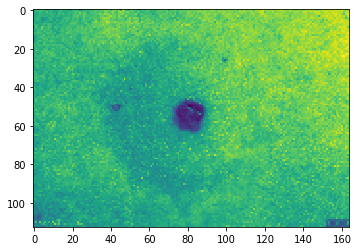

In [18]:
# Convert to grayscale
img_grayscale = cv2.cvtColor(img_BGR_small, cv2.COLOR_BGR2GRAY)
print(img_grayscale.shape)
plt.imshow(img_grayscale);

(113, 164, 3)


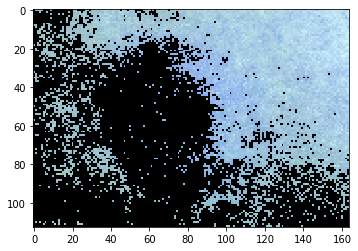

In [19]:
# Foreground and background segmentation (otsu)
## Segment image using otsu binarization and thresholding
threshold_value, threshold_image = cv2.threshold(img_grayscale, 0, 255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
threshold_image_binary = 1- threshold_image/255
threshold_image_binary = np.repeat(threshold_image_binary[:, :, np.newaxis], 3, axis=2)
img_face_only = np.multiply(threshold_image_binary, img_BGR_small)
img_face_only = img_face_only.astype(np.uint8)
print(img_face_only.shape)
plt.imshow(img_face_only);

(113, 164, 3)


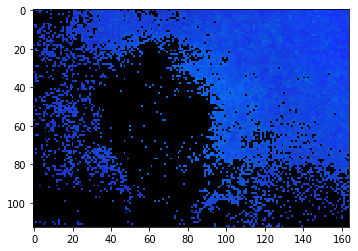

In [20]:
# Convert to HSV and YCrCb color spaces and detect potential pixels
img_HSV = cv2.cvtColor(img_face_only, cv2.COLOR_BGR2HSV)
print(img_HSV.shape)
plt.imshow(img_HSV);

(113, 164, 3)


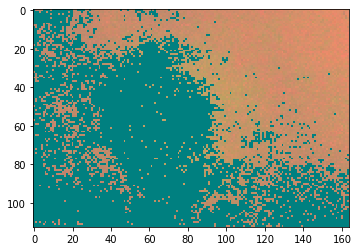

In [21]:
# Convert to HSV and YCrCb color spaces and detect potential pixels
img_YCrCb = cv2.cvtColor(img_face_only, cv2.COLOR_BGR2YCrCb)
print(img_YCrCb.shape)
plt.imshow(img_YCrCb);

(113, 164, 3)


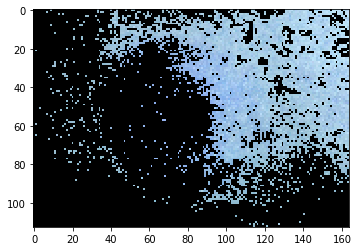

In [22]:
# Aggregate skin pixels
blue = []
green = []
red = []

height, width, channels = img_face_only.shape

for i in range (height):
    for j in range (width):
        if((img_HSV.item(i, j, 0) <= 170) and (140 <= img_YCrCb.item(i, j, 1) <= 170) and (90 <= img_YCrCb.item(i, j, 2) <= 120)):
            blue.append(img_face_only[i, j].item(0))
            green.append(img_face_only[i, j].item(1))
            red.append(img_face_only[i, j].item(2))
        else:
            img_face_only[i, j] = [0, 0, 0]

print(img_face_only.shape)
plt.imshow(img_face_only);

In [23]:
# Determine mean skin tone estimate in BGR
skin_tone_estimate_BGR = [np.mean(blue), np.mean(green), np.mean(red)]
print ("mean skin tone estimate (BGR)", skin_tone_estimate_BGR[0], skin_tone_estimate_BGR[1], skin_tone_estimate_BGR[2], "]")

mean skin tone estimate (BGR) 159.4935753292644 197.650497911982 227.46498554449084 ]


In [24]:
# Determine mean skin tone estimate in RGB
skin_tone_estimate_RGB = [np.mean(red), np.mean(green), np.mean(blue)]
print ("mean skin tone estimate (RGB)", skin_tone_estimate_BGR[0], skin_tone_estimate_BGR[1], skin_tone_estimate_BGR[2], "]")

mean skin tone estimate (RGB) 159.4935753292644 197.650497911982 227.46498554449084 ]


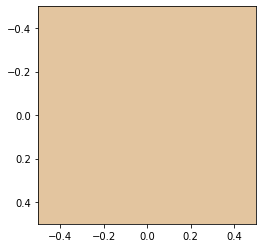

In [25]:
# Display the skin tone
tone_rgb = [[[x/255 for x in skin_tone_estimate_RGB]]]
plt.imshow(tone_rgb);

In [26]:
# Convert to LAB color space
import skimage
from skimage import color
tone_lab = color.rgb2lab(tone_rgb)
tone_lab

array([[[81.37820172,  4.9510789 , 23.04011168]]])

In [27]:
# Get individual colors in LAB color space
l,a,b = tone_lab.flatten()

In [28]:
# Calculate ita angle
import numpy as np
import math
ita = np.arctan((l-50)/b)*(180/math.pi)
ita

53.71123189728538

## Classify the color according to the individual topology angle
https://onlinelibrary.wiley.com/doi/pdf/10.1111/bjd.12529
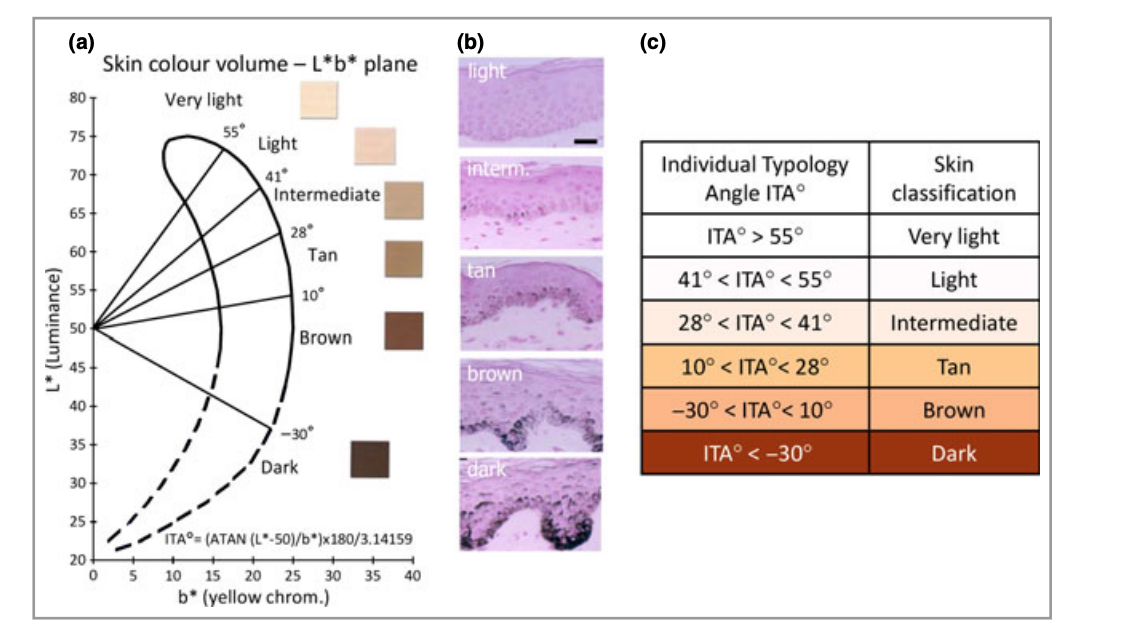

In [29]:
def ita_2_tone(ita):
    if ita > 55:
        return 'very_light'
    if 41 < ita <=55:
        return 'light'
    if 28 < ita <=41:
        return 'intermediate'
    if 10 < ita <= 28:
        return 'tan'
    if -30 < ita <= 10:
        return 'brown'
    if ita <= -30:
        return 'dark'
    if ita != ita:
        return 'undertermined'

In [30]:
ita_2_tone(ita)

'light'